In [1]:

%matplotlib inline
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd


city_data_df = pd.read_csv("Resource/city_data.csv")
ride_file_df = pd.read_csv("Resource/ride_data.csv")



In [40]:
pyber_data_df = pd.merge(right = city_data_df, left=ride_file_df, on = ['city', 'city'] )
pyber_data_df

,city,date,fare,ride_id,driver_count,type
0,Lake Jonathanshire,2019-01-14 10:14:22,13.83,5739410935873,5,Urban
1,Lake Jonathanshire,2019-04-07 20:51:11,31.25,4441251834598,5,Urban
2,Lake Jonathanshire,2019-03-09 23:45:55,19.89,2389495660448,5,Urban
3,Lake Jonathanshire,2019-04-07 18:09:21,24.28,7796805191168,5,Urban
4,Lake Jonathanshire,2019-01-02 14:14:50,13.89,424254840012,5,Urban
...,...,...,...,...,...,...
2370,West Heather,2019-04-18 19:33:12,46.60,3671003215967,4,Rural
2371,West Heather,2019-03-02 21:04:10,20.99,5766454453070,4,Rural
2372,West Heather,2019-03-06 20:06:51,48.11,2570548892682,4,Rural
2373,West Heather,2019-02-02 06:28:04,53.07,2462950442268,4,Rural


In [54]:
# 2. Get the total rides for each city type
total_rides = pyber_data_df.groupby(['type']).count()['ride_id']
total_rides

type
Rural        125
Suburban     625
Urban       1625
Name: ride_id, dtype: int64

In [41]:
# 2. Get the total drivers for each city type
total_drivers = city_data_df.groupby(['type']).sum()['driver_count']


In [43]:
#  3. Get the total amount of fares for each city type
total_fare = pyber_data_df.groupby(['type']).sum()['fare']

In [48]:
#  4. Get the average fare per ride for each city type. 
fare_average_per_ride = total_fare/total_rides


In [47]:
# 5. Get the average fare per driver for each city type. 
fare_average_per_driver = total_fare/ total_drivers

In [57]:
#  6. Create a PyBer summary DataFrame. 

pyber_summary_df = pd.DataFrame({
          "Total Rides": total_rides,
          "Total Driver": total_drivers,
          "Total Fare": total_fare,
          "Average Fare per Ride" : fare_average_per_ride,
          "Average Fare per Driver" : fare_average_per_driver})
pyber_summary_df


,Total Rides,Total Driver,Total Fare,Average Fare per Ride,Average Fare per Driver
type,,,,,
Rural,125,78,4327.93,34.623440,55.486282
Suburban,625,490,19356.33,30.970128,39.502714
Urban,1625,2405,39854.38,24.525772,16.571468


In [60]:
#  7. Cleaning up the DataFrame. Delete the index name
pyber_summary_df.index.name = None
pyber_summary_df

,Total Rides,Total Driver,Total Fare,Average Fare per Ride,Average Fare per Driver
Rural,125,78,4327.93,34.623440,55.486282
Suburban,625,490,19356.33,30.970128,39.502714
Urban,1625,2405,39854.38,24.525772,16.571468


In [62]:
#  8. Format the columns.
pyber_summary_df['Total Fare'] = pyber_summary_df['Total Fare'].map("${:,.2f}".format)
pyber_summary_df['Average Fare per Ride'] = pyber_summary_df['Average Fare per Ride'].map("{:.2f}".format)
pyber_summary_df['Average Fare per Driver'] = pyber_summary_df['Average Fare per Driver'].map("{:.2f}".format)


In [63]:
pyber_summary_df

,Total Rides,Total Driver,Total Fare,Average Fare per Ride,Average Fare per Driver
Rural,125,78,"$4,327.93",34.62,55.49
Suburban,625,490,"$19,356.33",30.97,39.50
Urban,1625,2405,"$39,854.38",24.53,16.57


In [11]:
# Deliverable 2. Create a multiple line plot that shows the total weekly of the fares for each type of city

In [64]:
# 1. Read the merged DataFrame
pyber_data_df.head()

,city,date,fare,ride_id,driver_count,type
0,Lake Jonathanshire,2019-01-14 10:14:22,13.83,5739410935873,5,Urban
1,Lake Jonathanshire,2019-04-07 20:51:11,31.25,4441251834598,5,Urban
2,Lake Jonathanshire,2019-03-09 23:45:55,19.89,2389495660448,5,Urban
3,Lake Jonathanshire,2019-04-07 18:09:21,24.28,7796805191168,5,Urban
4,Lake Jonathanshire,2019-01-02 14:14:50,13.89,424254840012,5,Urban


In [141]:
df = pyber_data_df.groupby(['type', 'date']).sum()[['fare']]
df

fare
type  date                      
Rural 2019-01-01 09:45:36  43.69
      2019-01-02 11:18:32  52.12
      2019-01-03 19:51:01  19.90
      2019-01-04 03:31:26  24.88
      2019-01-06 07:38:40  47.33
...                          ...
Urban 2019-05-08 04:20:00  21.99
      2019-05-08 04:39:49  18.45
      2019-05-08 07:29:01  18.55
      2019-05-08 11:38:35  19.77
      2019-05-08 13:10:18  18.04

[2375 rows x 1 columns]

In [142]:
# 3. Reset the index on the DataFrame you created in #1. This is needed to use the 'pivot()' function.
df = df.reset_index()


In [143]:
# 4. Create a pivot table with the 'date' as the index, the columns ='type', and values='fare' 
# to get the total fares for each type of city by the date. 
df = df.pivot_table(index = 'date', columns= 'type',values='fare' )


In [144]:
# 5. Create a new DataFrame from the pivot table DataFrame using loc on the given dates, '2019-01-01':'2019-04-29'.
df = df.loc['2019-01-01':'2019-04-29']
df

type,Rural,Suburban,Urban
date,,,
2019-01-01 00:08:16,NaN,NaN,37.91
2019-01-01 00:46:46,NaN,47.74,NaN
2019-01-01 02:07:24,NaN,24.07,NaN
2019-01-01 03:46:50,NaN,NaN,7.57
2019-01-01 05:23:21,NaN,NaN,10.75
...,...,...,...
2019-04-28 14:28:36,NaN,NaN,11.46
2019-04-28 16:29:16,NaN,NaN,36.42
2019-04-28 17:26:52,NaN,NaN,31.43


In [145]:
# 6. Set the "date" index to datetime datatype. This is necessary to use the resample() method in Step 8.
# df.index = pd.to_datetime(df.index)

df.index = pd.to_datetime(df.index)

In [146]:
# 7. Check that the datatype for the index is datetime using df.info()
df.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 2196 entries, 2019-01-01 00:08:16 to 2019-04-28 19:35:03
Data columns (total 3 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Rural     114 non-null    float64
 1   Suburban  573 non-null    float64
 2   Urban     1509 non-null   float64
dtypes: float64(3)
memory usage: 68.6 KB


In [186]:
# 8. Create a new DataFrame using the "resample()" function by week 'W' and get the sum of the fares for each week.
new_df = df.resample('w').sum()


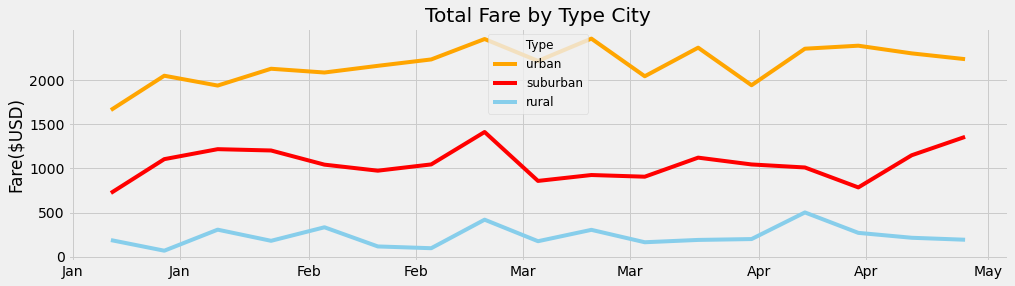

In [224]:
# 8. Using the object-oriented interface method, plot the resample DataFrame using the df.plot() function. 

# Import the style from Matplotlib.
from matplotlib import style
import matplotlib.dates as mdates
import numpy as np
urban_fare = new_df['Urban']
subrban_fare = new_df['Suburban']
rural_fare = new_df['Rural']

labels = new_df.index
fig = plt.figure(figsize=(15, 4))
ax = fig.add_subplot()
ax.plot(labels, urban_fare, label='urban', color = "orange")
ax.plot(labels, subrban_fare, label='suburban', color = "red")
ax.plot(labels, rural_fare, label='rural', color = "skyblue")
ax.set_title('Total Fare by Type City')
ax.set_ylabel('Fare($USD)')
ax.set_yticks(np.arange(0, 2500, step=500))
myFmt = mdates.DateFormatter('%b')
ax.xaxis.set_major_formatter(myFmt)

ax.legend()
lgnd = plt.legend(fontsize="12", mode="Expanded",
         scatterpoints=1, loc="best", title=" Type")
lgnd.legendHandles[0]._sizes = [65]
lgnd.legendHandles[1]._sizes = [65]
lgnd.legendHandles[2]._sizes = [65]
lgnd.get_title().set_fontsize(12)

# Use the graph style fivethirtyeight.
style.use('fivethirtyeight')

plt.savefig("Resource/analysis/PyBer_fare_summary.png")